In [1]:
import numpy as np
import xray
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
#6901085
#4901414
#4901412

!wget http://www.usgodae.org/ftp/outgoing/argo/dac/coriolis/4901412/4901412.nc


--2015-08-20 23:49:41--  http://www.usgodae.org/ftp/outgoing/argo/dac/coriolis/6901085/6901085_prof.nc
Resolving www.usgodae.org... 199.9.2.160, 2001:480:200:22::2:160
Connecting to www.usgodae.org|199.9.2.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530884 (518K) [application/x-netcdf]
Saving to: `6901085_prof.nc'

100%[======================================>] 530,884      866K/s   in 0.6s    

2015-08-20 23:49:42 (866 KB/s) - `6901085_prof.nc' saved [530884/530884]



In [2]:

ds = xray.open_dataset('4901412_prof.nc')

In [3]:
ds

<xray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 0, N_LEVELS: 78, N_PARAM: 3, N_PROF: 75)
Coordinates:
  * N_CALIB                       (N_CALIB) int64 0
  * N_HISTORY                     (N_HISTORY) int64 
  * N_LEVELS                      (N_LEVELS) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * N_PARAM                       (N_PARAM) int64 0 1 2
  * N_PROF                        (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
Data variables:
    DATA_TYPE                     object b'Argo profile    '
    FORMAT_VERSION                object b'3.1 '
    HANDBOOK_VERSION              object b'1.2 '
    REFERENCE_DATE_TIME           object b'19500101000000'
    DATE_CREATION                 object b'20141125110037'
    DATE_UPDATE                   object b'20141125110037'
    PLATFORM_NUMBER               (N_PROF) object b'4901412 ' b'4901412 ' ...
    PROJECT_NAME                  (N_PROF) object b'BSH                                                             ' ...


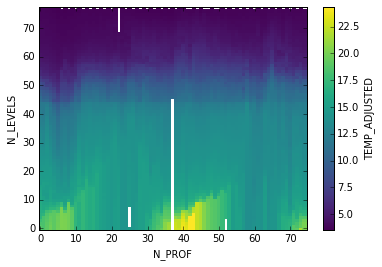

In [4]:
xray.plot.pcolormesh(ds['TEMP_ADJUSTED'].T)

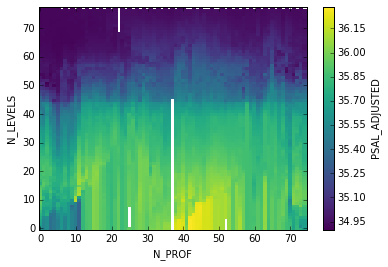

In [5]:
xray.plot.pcolormesh(ds['PSAL_ADJUSTED'].T)

In [8]:
np.savez('argo_float_4901412',
         date=ds['JULD'].values,
         lon=ds['LONGITUDE'].values,
         lat=ds['LATITUDE'].values,
         levels=ds['N_LEVELS'].values,
         T=ds['TEMP_ADJUSTED'].values.T,
         S=ds['PSAL_ADJUSTED'].values.T,
         P=ds['PRES_ADJUSTED'].values.T,)
         

In [7]:
d = np.load('argo_float_4901412.npz')

In [8]:
d.keys()

['S', 'lat', 'lon', 'T', 'date']

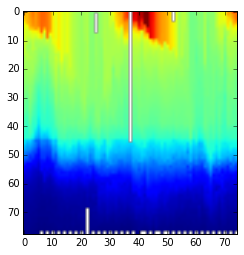

In [9]:
plt.imshow(d['T'])

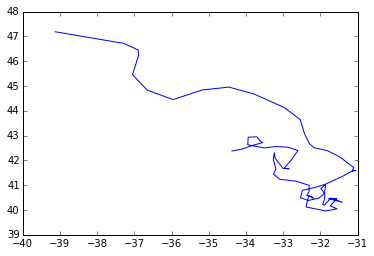

In [38]:
plt.plot(d['lon'], d['lat'])

In [13]:
ds['PRES_ADJUSTED'][2]

<xray.DataArray 'PRES_ADJUSTED' (N_LEVELS: 78)>
array([    6.5       ,    10.39999962,    14.89999962,    20.90000153,
          25.80000114,    30.30000114,    36.10000229,    40.90000153,
          45.5       ,    50.79999924,    60.70000076,    70.        ,
          80.29999542,    89.8999939 ,    99.79999542,   110.        ,
         120.59999847,   130.69999695,   140.69999695,   150.3999939 ,
         160.59999084,   170.09999084,   180.19999695,   190.3999939 ,
         200.69999695,   210.59999084,   220.59999084,   229.8999939 ,
         240.59999084,   250.09999084,   260.70001221,   270.70001221,
         279.90002441,   290.        ,   300.6000061 ,   310.20001221,
         319.90002441,   329.70001221,   339.90002441,   349.70001221,
         374.80001831,   400.5       ,   425.30001831,   450.30001831,
         474.90002441,   550.20001221,   575.79998779,   600.5       ,
         625.        ,   650.5       ,   675.20001221,   700.        ,
         750.        ,   800.